Original Data Shape:
(1797, 65)

Original Data Head:
   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0      0.0      0.0      5.0     13.0      9.0      1.0      0.0      0.0   
1      0.0      0.0      0.0     12.0     13.0      5.0      0.0      0.0   
2      0.0      0.0      0.0      4.0     15.0     12.0      0.0      0.0   
3      0.0      0.0      7.0     15.0     13.0      1.0      0.0      0.0   
4      0.0      0.0      0.0      1.0     11.0      0.0      0.0      0.0   

   pixel_8  pixel_9  ...  pixel_55  pixel_56  pixel_57  pixel_58  pixel_59  \
0      0.0      0.0  ...       0.0       0.0       0.0       6.0      13.0   
1      0.0      0.0  ...       0.0       0.0       0.0       0.0      11.0   
2      0.0      0.0  ...       0.0       0.0       0.0       0.0       3.0   
3      0.0      8.0  ...       0.0       0.0       0.0       7.0      13.0   
4      0.0      0.0  ...       0.0       0.0       0.0       0.0       2.0   

   pixel_60  pi

C:\Users\basde\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



Shape of the data after UMAP transformation: (1797, 2)

Resulting UMAP DataFrame Head:
      UMAP_1     UMAP_2  digit_label
0  11.819383   8.540804            0
1   1.881484  11.459956            1
2   0.602094   8.526723            2
3  -7.191507   9.233486            3
4   5.182634  19.006207            4


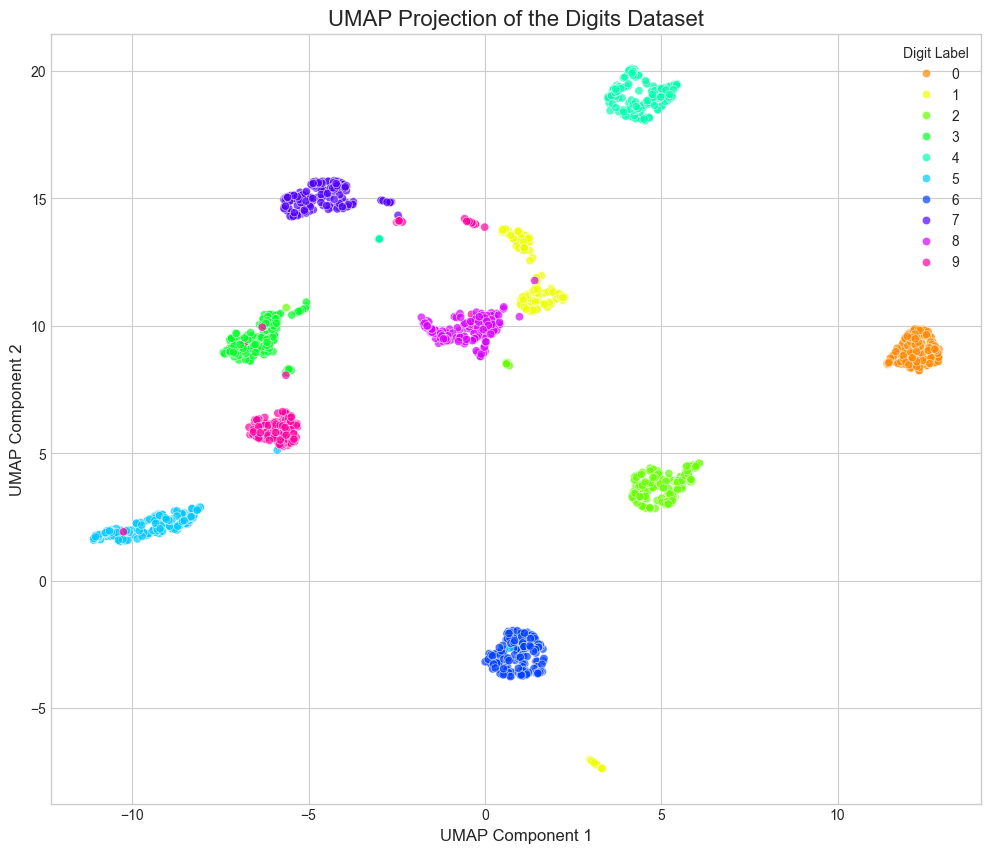

In [1]:
import pandas as pd
# Reverted to the standard, officially recommended import for umap-learn
import umap
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns

# --- When to Use UMAP and Data Requirements ---
# Uniform Manifold Approximation and Projection (UMAP) is a dimensionality reduction technique.
# It is particularly effective for visualizing high-dimensional datasets in a low-dimensional space (e.g., 2D or 3D).
#
# When to use it:
# - To visualize clusters or groups in your data.
# - As a preprocessing step for machine learning algorithms that perform poorly in high dimensions.
# - For exploring the underlying structure of your data.
#
# Data Requirements:
# - The input data should be numerical. If you have categorical data, it must be encoded into a numerical format first.
# - While not strictly required, it's often beneficial to scale your data (e.g., using StandardScaler) before applying UMAP,
#   especially if the features are on different scales.

# 1. Load a sample dataset
# We'll use the 'digits' dataset from scikit-learn, which contains images of handwritten digits.
digits = load_digits()
X = digits.data
y = digits.target

# For easier handling, let's create a pandas DataFrame
digits_df = pd.DataFrame(X, columns=[f'pixel_{i}' for i in range(X.shape[1])])
digits_df['digit_label'] = y

print("Original Data Shape:")
print(digits_df.shape)
print("\nOriginal Data Head:")
print(digits_df.head())

# 2. Select features to work with
# We will use all 64 pixel features to see if UMAP can find a meaningful structure.
features = digits_df.drop('digit_label', axis=1)

# 3. Apply the UMAP transformation
# We will reduce the 64 dimensions down to 2 components for easy visualization.
# Key hyperparameters for UMAP include:
# - n_neighbors: This determines the number of neighboring points used for local manifold approximation.
#   Lower values focus on local structure, while higher values focus on global structure.
# - min_dist: This controls how tightly UMAP is allowed to pack points together.
#   Lower values create more tightly packed clusters.
# - n_components: The number of dimensions to reduce to (typically 2 or 3).

# Instantiating the UMAP reducer using the standard import
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(features)

# The result is a new array with the same number of rows but only 2 columns (components).
print("\nShape of the data after UMAP transformation:", embedding.shape)

# 4. Show the result of applying the technique
# We'll create a new DataFrame for the UMAP results and visualize them.

# Create a DataFrame for the UMAP components
umap_df = pd.DataFrame(embedding, columns=['UMAP_1', 'UMAP_2'])

# Add the original digit labels to the new DataFrame for coloring the plot
umap_df['digit_label'] = y

print("\nResulting UMAP DataFrame Head:")
print(umap_df.head())

# Create a scatter plot to visualize the UMAP result
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='UMAP_1',
    y='UMAP_2',
    hue='digit_label',
    palette=sns.color_palette("hsv", 10),
    data=umap_df,
    legend='full',
    alpha=0.7
)
plt.title('UMAP Projection of the Digits Dataset', fontsize=16)
plt.xlabel('UMAP Component 1', fontsize=12)
plt.ylabel('UMAP Component 2', fontsize=12)
plt.legend(title='Digit Label')
plt.show()

